# Optimizing Player Engagement Insights from Behavioral Data Analysis in Gaming

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head(

In [23]:
#size of the dataset
df.shape

(640, 96)

In [4]:
#basic information of the dataset to understand its structure and the types of data it contains
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 96 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  640 non-null    int64 
 1   ï..O1       640 non-null    object
 2   A1_1        640 non-null    object
 3   A1_2        640 non-null    object
 4   A2          640 non-null    object
 5   A3          640 non-null    object
 6   A4          640 non-null    object
 7   A5          640 non-null    object
 8   A6          640 non-null    object
 9   A7          640 non-null    object
 10  A8          640 non-null    object
 11  B1          640 non-null    object
 12  B2          640 non-null    object
 13  B3          640 non-null    object
 14  C1          640 non-null    int64 
 15  C2          640 non-null    int64 
 16  C3          640 non-null    int64 
 17  C4          640 non-null    int64 
 18  C5          640 non-null    int64 
 19  C6          640 non-null    int64 
 20  C7        

# Data Cleaning and Preparation

In [5]:
#descriptive statistics for numerical columns to get a sense of the data distribution
numerical_stats = df.describe()
numerical_stats

,Unnamed: 0,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,...,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,320.500000,3.784375,2.987500,4.100000,2.700000,4.334375,2.154688,4.309375,3.253125,4.284375,...,2.128125,1.825000,3.728125,3.298437,4.087500,3.987500,2.035938,3.909375,3.100000,2.178125
std,184.896367,0.941350,1.076059,0.869947,1.049927,0.858032,1.059783,0.881690,1.303056,0.837542,...,1.236820,1.141341,1.181955,1.164148,0.953619,0.988114,1.120427,1.063510,1.359831,1.270647
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,160.750000,3.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,...,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,1.000000
50%,320.500000,4.000000,3.000000,4.000000,3.000000,5.000000,2.000000,5.000000,3.000000,4.000000,...,2.000000,1.000000,4.000000,3.000000,4.000000,4.000000,2.000000,4.000000,3.000000,2.000000
75%,480.250000,4.000000,4.000000,5.000000,3.000000,5.000000,3.000000,5.000000,4.000000,5.000000,...,3.000000,2.000000,5.000000,4.000000,5.000000,5.000000,3.000000,5.000000,4.000000,3.000000
max,640.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
#unique values for a few select categorical columns to understand the diversity in responses
nationalities_unique = df['A1_1'].unique()
regions_unique = df['A1_2'].unique()
educational_levels_unique = df['A3'].unique()

nationalities_unique, regions_unique, educational_levels_unique

(array(['Filipino ', 'American', 'Filipino', 'Mexican American ',
        'British ', 'american', 'Vietnamese', 'Vietnam', 'Friendly',
        'canadian', 'Norwegian', 'New Zealander', 'German', 'Singaporean',
        'British', 'USA', 'U.S.', 'White British ', 'Polish-American',
        'Australian', 'American ', 'White', 'Canadian', 'Scottish',
        'Citizen of the United States', 'Viet nam', 'Portuguese-Canadian',
        'United States', 'us', 'white', 'Mixed',
        'British / Filipino, I am a dual citizen ', 'Vietnamese-American',
        'America', 'White British', 'Welsh, British', 'White English ',
        'British - White ', 'South Korean', 'Italian', 'Anerican',
        'Cornish', 'Hispanic ', 'Myanmar', 'North American', 'China',
        ' American', 'Viet Nam', 'usa', 'Asian',
        'German, Native American ', 'Vieynam', 'Chinese', 'indonesian',
        'American (United States of America) ', 'Caucasian ',
        'American (United States)', 'American (U.S.A.)', 'US

In [8]:
#1.removing unnecessary columns, the 'Unnamed: 0' and 'ï..O1' which seem to be index and timestamp columns not relevant for analysis.
df_cleaned = df.drop(columns=['Unnamed: 0', 'ï..O1'])

In [9]:
#2.standardize the 'A1_1' nationality responses by grouping similar responses and correcting any incorrect entries.
nationality_corrections = {
    'American': ['American ', 'america', ' USA', 'Usa', 'us', 'usa', ' United States', 'the United States', 'US citizen', 'US', 'United States of America', 'American (United States)', 'American (U.S.A.)', 'American (USA) ', 'American (United States of America) ', 'United States', 'the United States ', 'United States ', 'United States of American', 'US Citizen'],
    'Filipino': ['Filipino ', 'FILIPINO', 'Philippines', 'filipino'],
    'Canadian': ['canadian', 'Canadian ', 'Candadian'],
    'British': ['British ', 'british ', 'UK', 'uk', 'British/English ', 'English ', 'White British ', 'White British', 'British - White '],
 
}

# Correcting nationality entries
for corrected_nationality, variations in nationality_corrections.items():
    df_cleaned['A1_1'] = df_cleaned['A1_1'].replace(variations, corrected_nationality)


In [10]:
#3.handling missing values, especially in columns related to game-playing habits ('D1' to 'D7').
missing_values = df_cleaned[['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']].isnull().sum()
nationalities_cleaned_unique = df_cleaned['A1_1'].unique()
missing_values, nationalities_cleaned_unique

(D1    6
 D2    5
 D3    1
 D4    0
 D5    0
 D6    0
 D7    6
 dtype: int64,
 array(['Filipino', 'American', 'Mexican American ', 'British', 'american',
        'Vietnamese', 'Vietnam', 'Friendly', 'Canadian', 'Norwegian',
        'New Zealander', 'German', 'Singaporean', 'USA', 'U.S.',
        'Polish-American', 'Australian', 'White', 'Scottish',
        'Citizen of the United States', 'Viet nam', 'Portuguese-Canadian',
        'white', 'Mixed', 'British / Filipino, I am a dual citizen ',
        'Vietnamese-American', 'America', 'Welsh, British',
        'White English ', 'South Korean', 'Italian', 'Anerican', 'Cornish',
        'Hispanic ', 'Myanmar', 'North American', 'China', ' American',
        'Viet Nam', 'Asian', 'German, Native American ', 'Vieynam',
        'Chinese', 'indonesian', 'Caucasian ', 'French',
        'Catalan (spanish)', 'Indonesia ', 'Filipino-American', 'Japanese',
        ' America', 'African American', 'Autsralian', 'Mixed race ',
        'Welsh', 'Ashenkaz

In [11]:
# Renaming columns to make them more readable
columns_mapping = {
    'A1_1': 'Nationality',
    'A1_2': 'Region',
    'A2': 'Biological_Sex',
    'A3': 'Highest_Educational_Level',
    'A4': 'Pet_or_Garden',
    'A5': 'Age',
    'A6': 'Ethnicity',
    'A7': 'Marital_Status',
    'A8': 'Employment_Status',
    'B1': 'Self_Isolation_Status',
    'B2': 'Self_Isolation_Duration',
    'B3': 'Worries_About_COVID',
    'C1': 'Limit_of_Earth_Support',
    'D1': 'Video_Games_Playing_Duration',
    'D2': 'Favorite_Video_Game_Genre',
    'E1': 'Activity_Catching_Bugs_Frequency',
    'F1': 'Feeling_Content'

}

df_cleaned_renamed = df_cleaned.rename(columns=columns_mapping)
df_cleaned_renamed.head()


,Nationality,Region,Biological_Sex,Highest_Educational_Level,Pet_or_Garden,Age,Ethnicity,Marital_Status,Employment_Status,Self_Isolation_Status,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32
0,Filipino,Asia,Male,Secondary school,A pet,11,Asian,"Single, never married",A student,Yes,...,1,2,5,4,5,4,1,5,1,1
1,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",A student,Yes,...,1,1,4,2,5,4,2,4,1,4
2,American,US/Canada,Male,Secondary school,Both,13,White,"Single, never married",A student,Yes,...,1,1,4,1,5,3,2,5,2,4
3,Filipino,Asia,Female,High school,A pet,13,Asian,"Single, never married",A student,Yes,...,3,2,3,4,5,5,2,5,1,2
4,Mexican American,US/Canada,Male,Secondary school,A pet,14,Hispanic or Latino,"Single, never married",A student,Yes,...,5,4,4,3,4,4,1,5,5,5


# Exploratory Data Analysis (EDA)

## Distribution of Game-Playing Habits

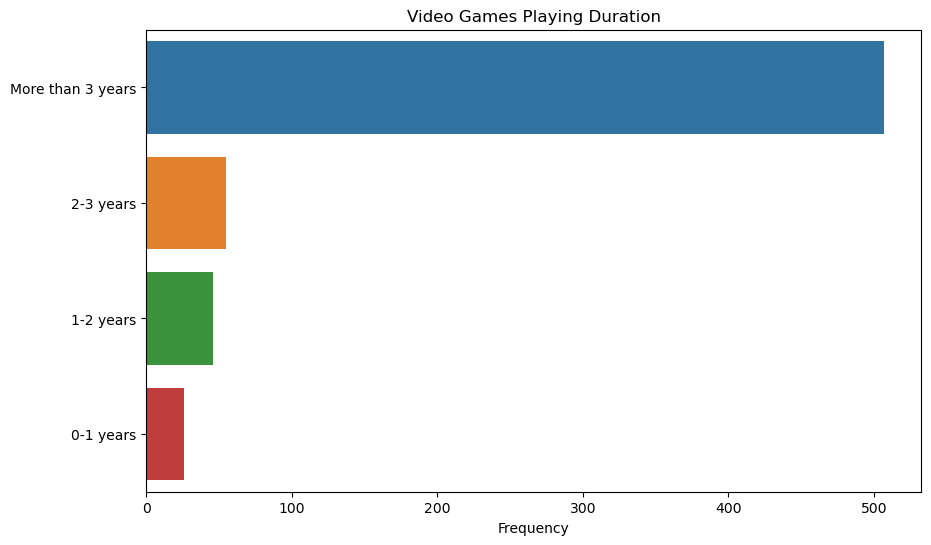

In [24]:
# Video Games Playing Duration
plt.figure(figsize=(10, 6))
if df_cleaned_renamed['Video_Games_Playing_Duration'].dtype == 'object':
    sns.countplot(y='Video_Games_Playing_Duration', data=df_cleaned_renamed, order=df_cleaned_renamed['Video_Games_Playing_Duration'].value_counts().index)
    plt.title('Video Games Playing Duration')
    plt.xlabel('Frequency')
    plt.ylabel('')
else:
    sns.histplot(df_cleaned_renamed['Video_Games_Playing_Duration'], kde=True)
    plt.title('Video Games Playing Duration')
    plt.xlabel('Duration')
    plt.ylabel('Frequency')
plt.show()

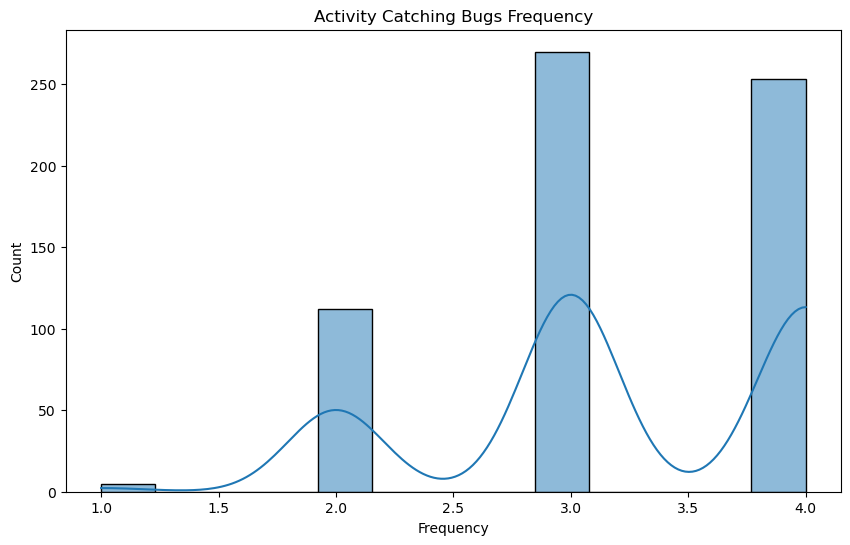

In [25]:
# Activity Catching Bugs Frequency
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_renamed['Activity_Catching_Bugs_Frequency'], kde=True)
plt.title('Activity Catching Bugs Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

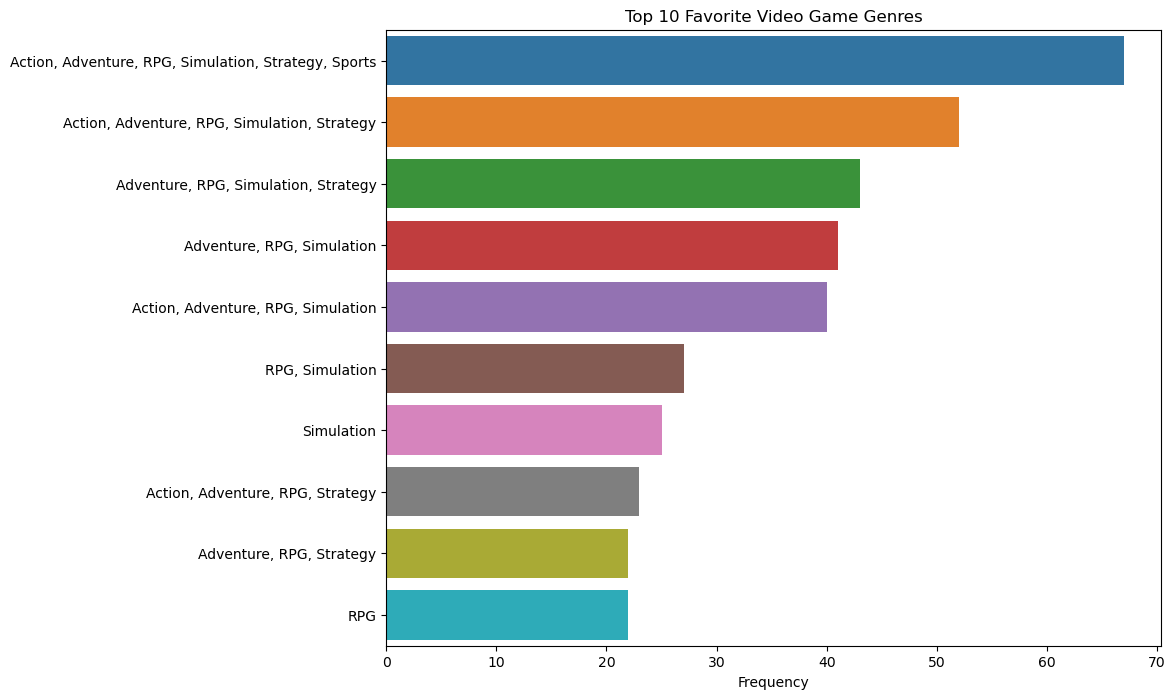

In [26]:
top_10_genres = df_cleaned_renamed['Favorite_Video_Game_Genre'].value_counts().nlargest(10).index
filtered_df_for_genres = df_cleaned_renamed[df_cleaned_renamed['Favorite_Video_Game_Genre'].isin(top_10_genres)]
plt.figure(figsize=(10, 8))
sns.countplot(y='Favorite_Video_Game_Genre', data=filtered_df_for_genres, order=filtered_df_for_genres['Favorite_Video_Game_Genre'].value_counts().index)
plt.title('Top 10 Favorite Video Game Genres')
plt.xlabel('Frequency')
plt.ylabel('')
plt.show()

## Demographic Insights

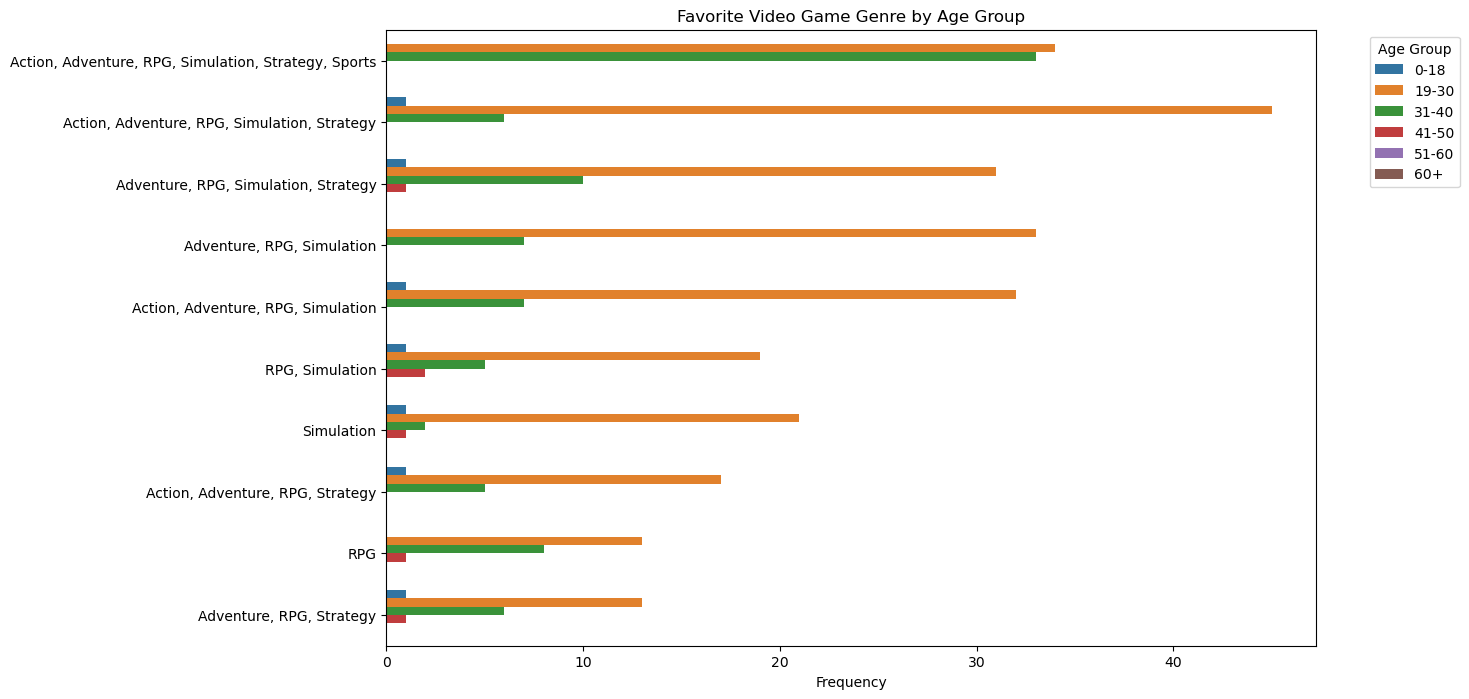

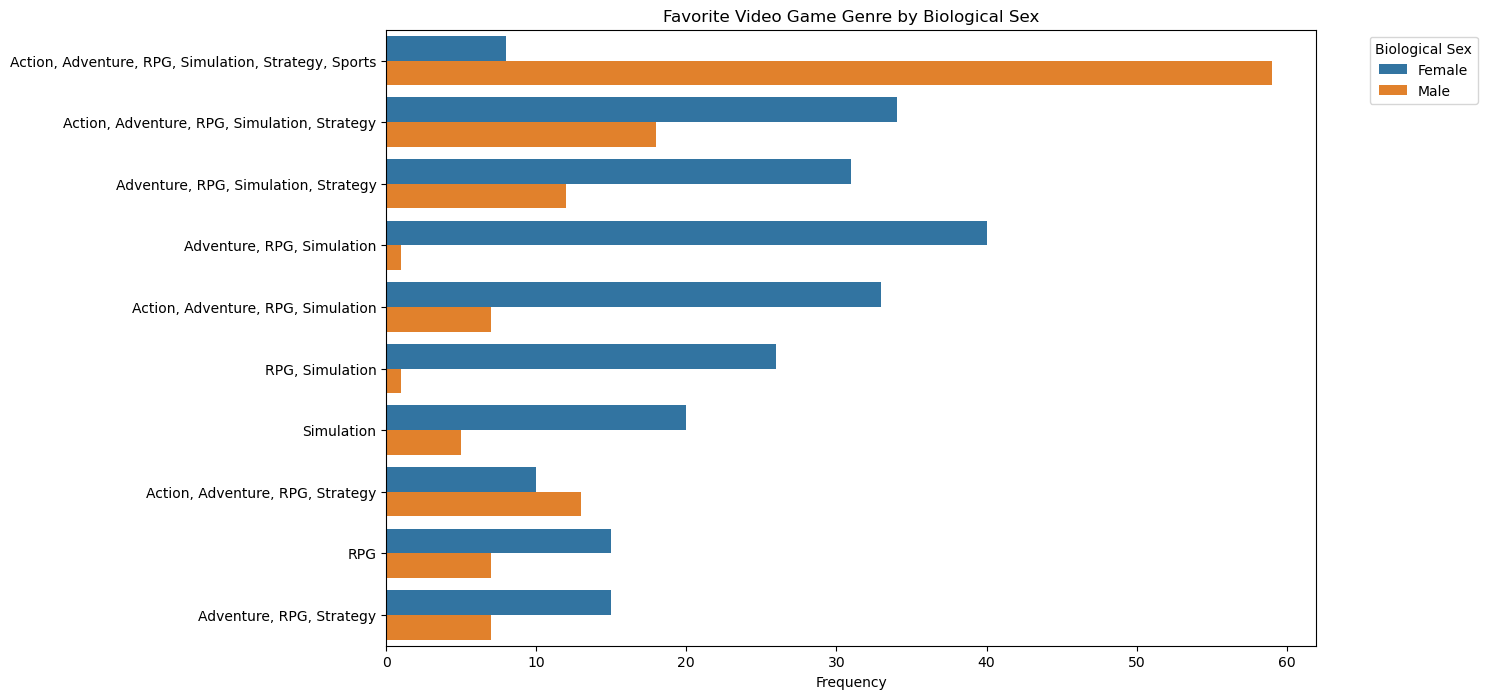

In [16]:
# Age and Gender relationship with Favorite Video Game Genre
# For simplicity, we'll first create age groups to facilitate analysis
# Then, we'll visualize the top genres across these demographic factors

# Converting 'Age' to numeric to create age groups. 
df_cleaned_renamed['Age'] = pd.to_numeric(df_cleaned_renamed['Age'], errors='coerce')


bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
df_cleaned_renamed['Age_Group'] = pd.cut(df_cleaned_renamed['Age'], bins=bins, labels=labels, right=False)
df_filtered_for_top_genres = df_cleaned_renamed[df_cleaned_renamed['Favorite_Video_Game_Genre'].isin(top_10_genres)]

# Age Group vs Favorite Game Genre
plt.figure(figsize=(12, 8))
sns.countplot(y='Favorite_Video_Game_Genre', hue='Age_Group', data=df_filtered_for_top_genres, order=top_10_genres)
plt.title('Favorite Video Game Genre by Age Group')
plt.xlabel('Frequency')
plt.ylabel('')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Biological Sex vs Favorite Game Genre
plt.figure(figsize=(12, 8))
sns.countplot(y='Favorite_Video_Game_Genre', hue='Biological_Sex', data=df_filtered_for_top_genres, order=top_10_genres)
plt.title('Favorite Video Game Genre by Biological Sex')
plt.xlabel('Frequency')
plt.ylabel('')
plt.legend(title='Biological Sex', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Correlation Analysis

In [17]:
# Checking the column names again to find the correct ones for engagement indicators
correct_engagement_indicators = [col for col in df_cleaned_renamed.columns if col.startswith('F')]
correct_engagement_indicators[:10] 


['Favorite_Video_Game_Genre',
 'Feeling_Content',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'F9']

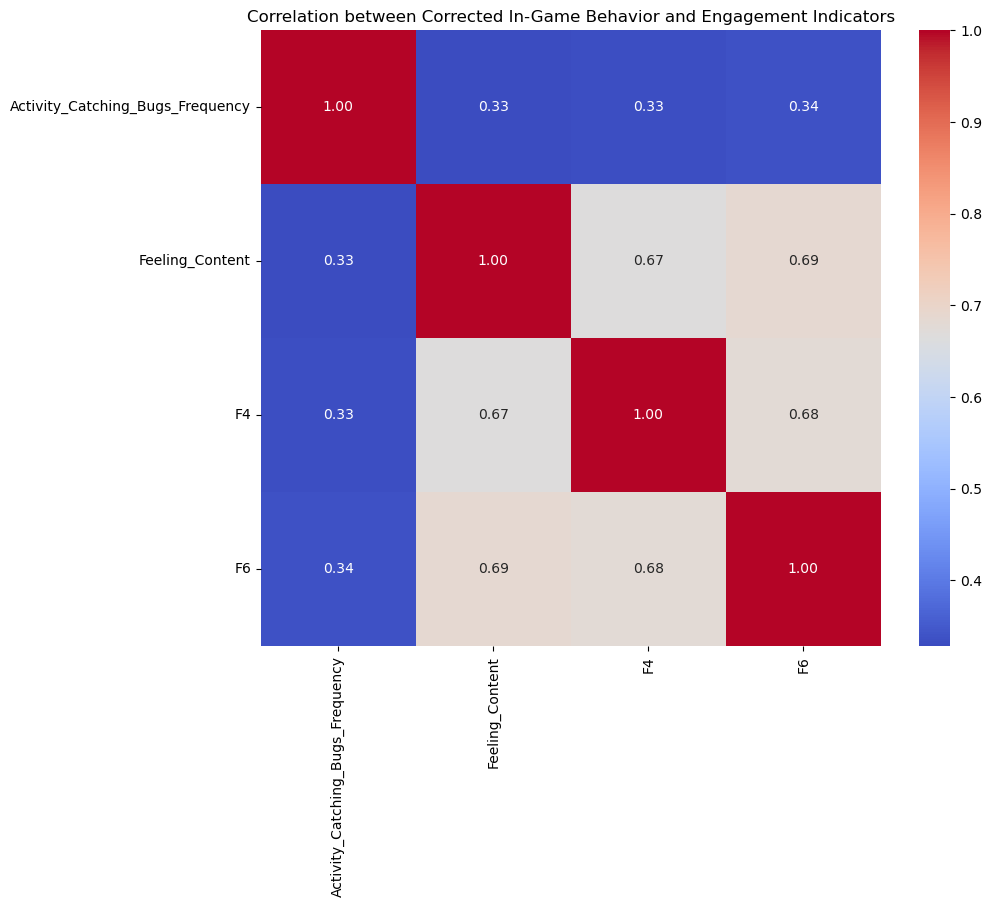

In [19]:
# Correctly defining the in-game behavior subset for the correlation analysis
in_game_behavior_subset_corrected = ['Activity_Catching_Bugs_Frequency']


correlation_matrix_final = df_cleaned_renamed[in_game_behavior_subset_corrected + engagement_indicators_subset_corrected].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_final, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Corrected In-Game Behavior and Engagement Indicators')
plt.show()


## Cluster Analysis to Identify Player Personas

/Users/rafat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


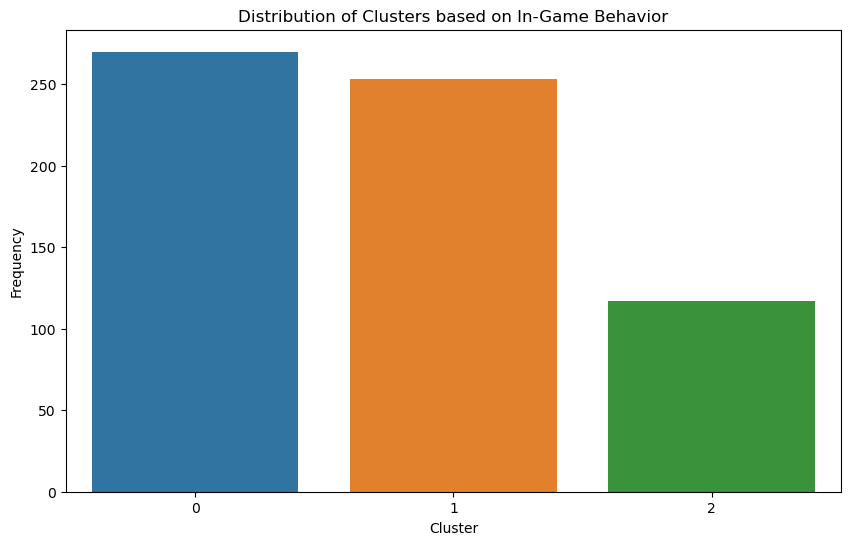

In [21]:
# Selecting a subset of variables for clustering
cluster_variables = ['Activity_Catching_Bugs_Frequency']
df_clustering = df_cleaned_renamed[cluster_variables].dropna()

# Scaling the data
scaler = StandardScaler()
df_clustering_scaled = scaler.fit_transform(df_clustering)

# Performing K-Means clustering with an arbitrary choice of 3 clusters for demonstration purposes
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_clustering_scaled)

# Adding cluster labels to the original dataframe for analysis
df_clustering['Cluster'] = clusters

# Visualizing the distribution of clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df_clustering)
plt.title('Distribution of Clusters based on In-Game Behavior')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.show()


## Predictive Modeling for Player Engagement

In [22]:
# Simplified Feature Selection for demonstration
features = ['Age', 'Activity_Catching_Bugs_Frequency']
target = 'Feeling_Content'

# Dropping rows with missing values in selected features and target for simplicity
ml_df = df_cleaned_renamed.dropna(subset=features + [target])

# Data Preprocessing

scaler = StandardScaler()
X = scaler.fit_transform(ml_df[features])
y = ml_df[target].values

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model using RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

rmse


0.7098738979002098